In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hotel-booking-demand/hotel_bookings.csv


reading dataframe

In [2]:
df = pd.read_csv("/kaggle/input/hotel-booking-demand/hotel_bookings.csv")
pd.set_option('display.max_columns', None)
df.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.shape

(119390, 32)

In [4]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Clearing null values

In [5]:
df.dropna(subset=['country'],inplace=True)
df.dropna(subset=['children'],inplace=True)

In [6]:
df.agent.fillna(0,inplace=True)
df.company.fillna(0,inplace=True)

In [7]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [8]:
df.duplicated().sum()

31958

dropping duplicates

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86940 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           86940 non-null  object 
 1   is_canceled                     86940 non-null  int64  
 2   lead_time                       86940 non-null  int64  
 3   arrival_date_year               86940 non-null  int64  
 4   arrival_date_month              86940 non-null  object 
 5   arrival_date_week_number        86940 non-null  int64  
 6   arrival_date_day_of_month       86940 non-null  int64  
 7   stays_in_weekend_nights         86940 non-null  int64  
 8   stays_in_week_nights            86940 non-null  int64  
 9   adults                          86940 non-null  int64  
 10  children                        86940 non-null  float64
 11  babies                          86940 non-null  int64  
 12  meal                           

In [11]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.00000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000
mean,0.275903,80.193375,2016.211824,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,81.11210,10.741822,0.753497,106.574804,0.083448,0.699459
std,0.446971,86.100147,0.686016,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,109.94501,53.492220,10.041816,54.957439,0.280402,0.831840
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.00000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,543.000000,391.000000,5400.000000,8.000000,5.000000


Lets see the unique values

In [12]:
for i in df.columns:
    if len(df[i].unique())<35:
        print('Unique value of ',i,':   ',df[i].unique())

Unique value of  hotel :    ['Resort Hotel' 'City Hotel']
Unique value of  is_canceled :    [0 1]
Unique value of  arrival_date_year :    [2015 2016 2017]
Unique value of  arrival_date_month :    ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
Unique value of  arrival_date_day_of_month :    [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Unique value of  stays_in_weekend_nights :    [ 0  1  2  4  3  6 13  8  5  7 12  9 16 10 14]
Unique value of  stays_in_week_nights :    [ 0  1  2  3  4  5 11  8 10  6  7 15  9 12 33 20 14 16 21 13 30 19 24 40
 22 25 17 32 26 18 34 35 41]
Unique value of  adults :    [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
Unique value of  children :    [ 0.  1.  2. 10.  3.]
Unique value of  babies :    [ 0  1  2 10  9]
Unique value of  meal :    ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique value of  market_segment :    ['Direct' 'Corporate' 'Online TA' 'Offl

# Exploratory Data Analysis


**Distribution of Unique values**

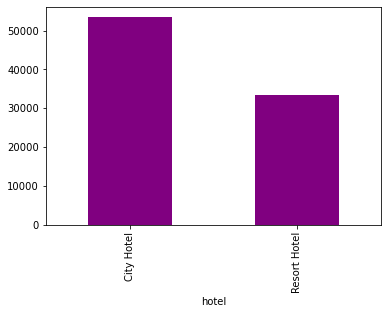

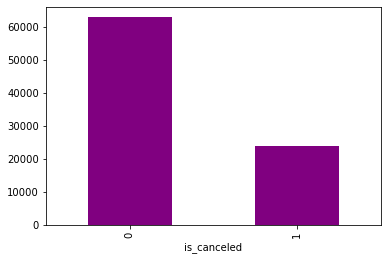

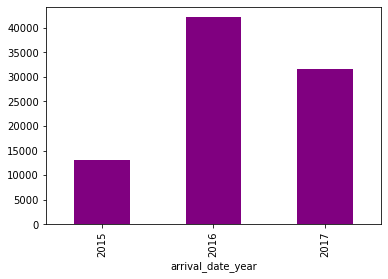

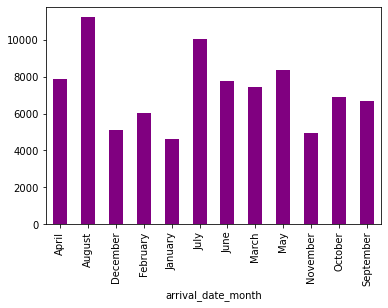

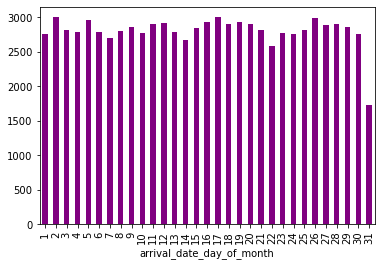

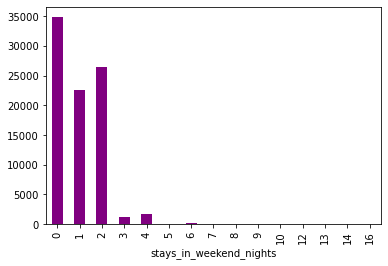

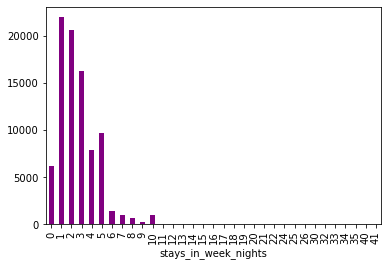

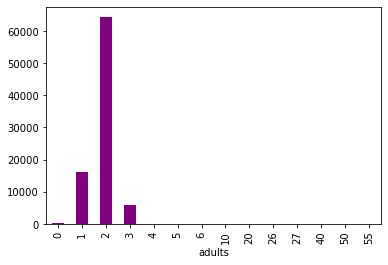

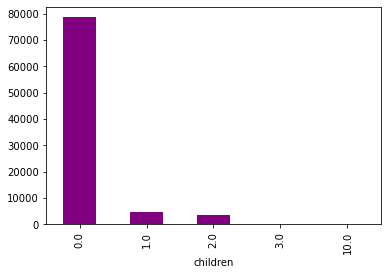

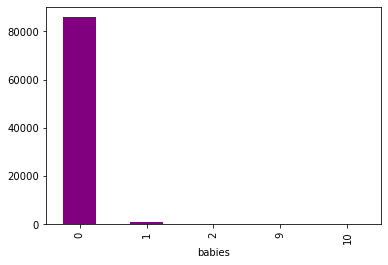

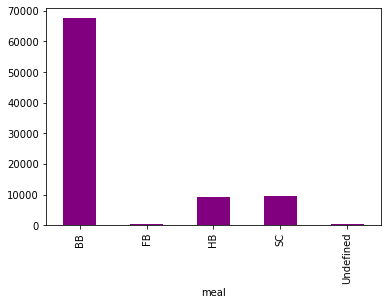

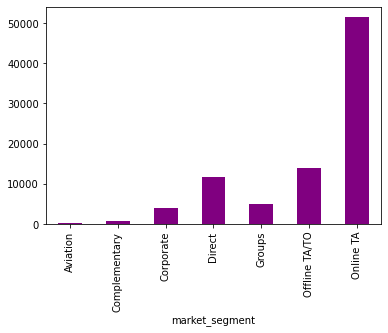

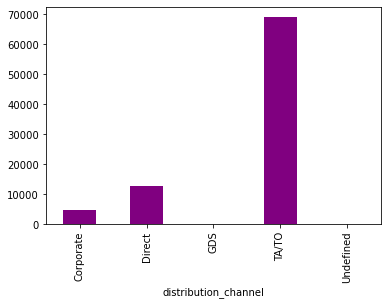

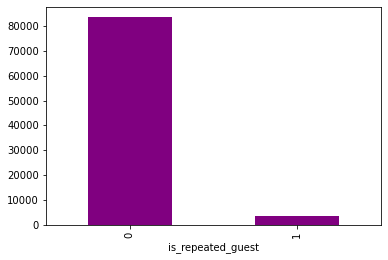

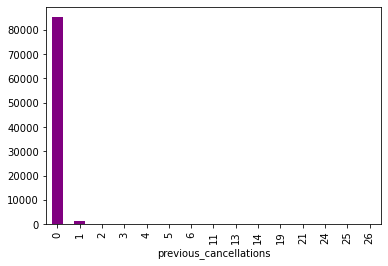

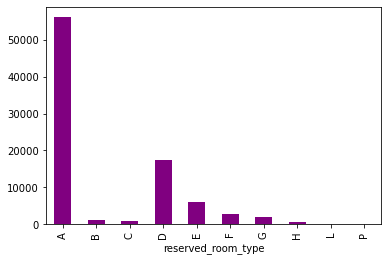

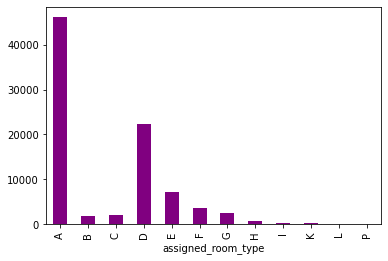

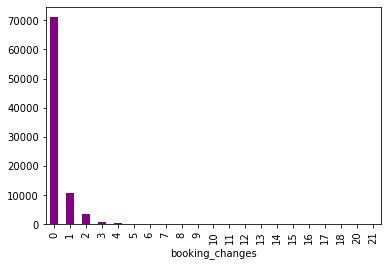

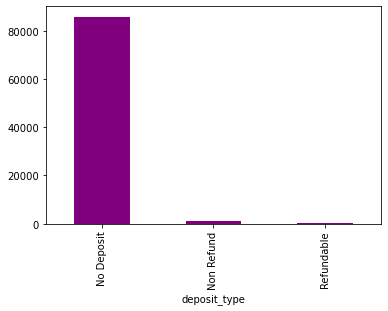

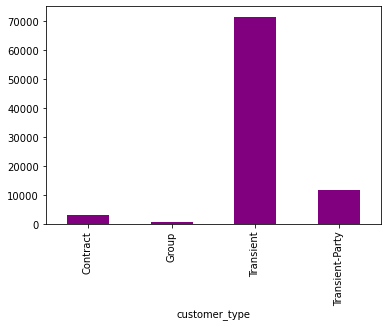

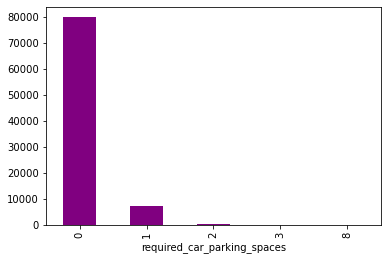

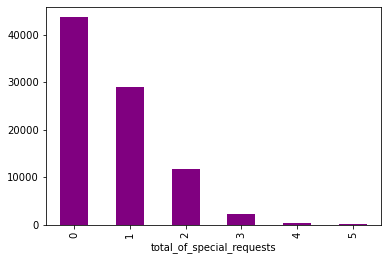

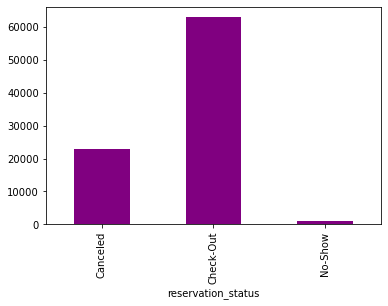

In [13]:
for i in df.columns:
    if len(df[i].unique())<34:
        df.groupby(i)['reservation_status'].count().plot.bar(color='purple')
        plt.show()

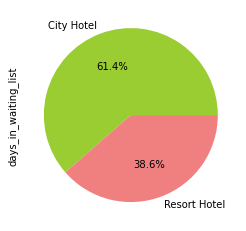

In [14]:
df.groupby(['hotel'])['days_in_waiting_list'].count().plot.pie(radius = 1,autopct='%1.1f%%',colors=['yellowgreen', 'lightcoral'])

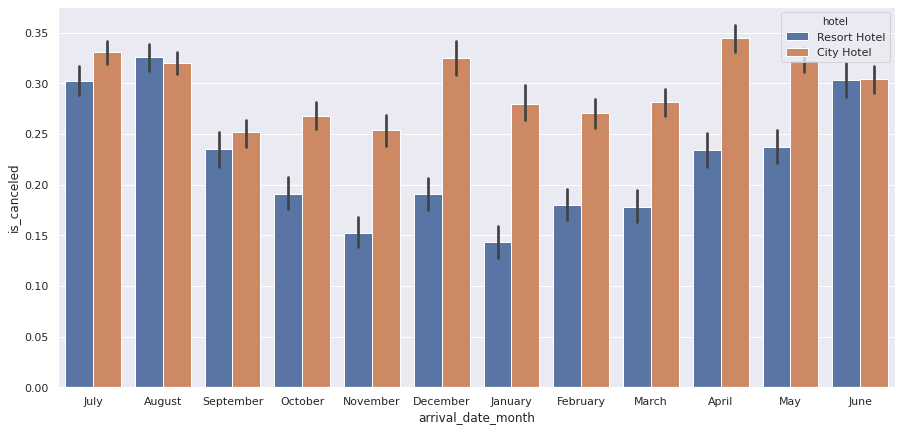

In [15]:
plt.figure(figsize = (15,7))
sns.set(style="darkgrid")
sns.barplot(x = 'arrival_date_month', y = 'is_canceled',hue='hotel', data = df)

As it can be clearly seen that the engagement of city hotel is more as well as demand hotels in winters is less.

# Feature Engg

We need to encode the categorical Variables
* For that we can either use Label encoder/Map values or One hot encoder/dummies
* If the categorical variable is ordinal use Label Encoder else use One hot encoder


In [16]:
dummy=pd.get_dummies(df[['hotel','meal','country', 'market_segment', 'distribution_channel','reserved_room_type',
       'assigned_room_type','deposit_type','customer_type','reservation_status']],drop_first=True)
pd.set_option('display.max_columns',None)
dummy.head()

,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,country_AGO,country_AIA,country_ALB,country_AND,country_ARE,country_ARG,country_ARM,country_ASM,country_ATA,country_ATF,country_AUS,country_AUT,country_AZE,country_BDI,country_BEL,country_BEN,country_BFA,country_BGD,country_BGR,country_BHR,country_BHS,country_BIH,country_BLR,country_BOL,country_BRA,country_BRB,country_BWA,country_CAF,country_CHE,country_CHL,country_CHN,country_CIV,country_CMR,country_CN,country_COL,country_COM,country_CPV,country_CRI,country_CUB,country_CYM,country_CYP,country_CZE,country_DEU,country_DJI,country_DMA,country_DNK,country_DOM,country_DZA,country_ECU,country_EGY,country_ESP,country_EST,country_ETH,country_FIN,country_FJI,country_FRA,country_FRO,country_GAB,country_GBR,country_GEO,country_GGY,country_GHA,country_GIB,country_GLP,country_GNB,country_GRC,country_GTM,country_GUY,country_HKG,country_HND,country_HRV,country_HUN,country_IDN,country_IMN,country_IND,country_IRL,country_IRN,country_IRQ,country_ISL,country_ISR,country_ITA,country_JAM,country_JEY,country_JOR,country_JPN,country_KAZ,country_KEN,country_KHM,country_KIR,country_KNA,country_KOR,country_KWT,country_LAO,country_LBN,country_LBY,country_LCA,country_LIE,country_LKA,country_LTU,country_LUX,country_LVA,country_MAC,country_MAR,country_MCO,country_MDG,country_MDV,country_MEX,country_MKD,country_MLI,country_MLT,country_MMR,country_MNE,country_MOZ,country_MRT,country_MUS,country_MWI,country_MYS,country_MYT,country_NAM,country_NCL,country_NGA,country_NIC,country_NLD,country_NOR,country_NPL,country_NZL,country_OMN,country_PAK,country_PAN,country_PER,country_PHL,country_PLW,country_POL,country_PRI,country_PRT,country_PRY,country_PYF,country_QAT,country_ROU,country_RUS,country_RWA,country_SAU,country_SDN,country_SEN,country_SGP,country_SLE,country_SLV,country_SMR,country_SRB,country_STP,country_SUR,country_SVK,country_SVN,country_SWE,country_SYC,country_SYR,country_TGO,country_THA,country_TJK,country_TMP,country_TUN,country_TUR,country_TWN,country_TZA,country_UGA,country_UKR,country_UMI,country_URY,country_USA,country_UZB,country_VEN,country_VGB,country_VNM,country_ZAF,country_ZMB,country_ZWE,market_segment_Complementary,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined,reserved_room_type_B,reserved_room_type_C,reserved_room_type_D,reserved_room_type_E,reserved_room_type_F,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,assigned_room_type_B,assigned_room_type_C,assigned_room_type_D,assigned_room_type_E,assigned_room_type_F,assigned_room_type_G,assigned_room_type_H,assigned_room_type_I,assigned_room_type_K,assigned_room_type_L,assigned_room_type_P,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Check-Out,reservation_status_No-Show
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

Drop_first to avoid dummy trap

In [17]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df['month']=lc.fit_transform(df.arrival_date_month)


In [18]:
df=pd.concat([df,dummy],axis='columns')

In [19]:
df.is_canceled.value_counts()

0    62953
1    23987
Name: is_canceled, dtype: int64

#train_test_split

In [20]:
from sklearn.model_selection import train_test_split
x=df.drop(['is_canceled','arrival_date_month','hotel','meal','country', 'market_segment', 'distribution_channel','reserved_room_type',
       'assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date'],axis='columns')
y=df.is_canceled
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)

In [21]:
xtrain.shape

(60858, 238)

In [22]:
xtest.shape

(26082, 238)

# XGBoost

In [23]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(xtrain,ytrain)
xg.score(xtest,ytest)

1.0

# **Logistic Regression**

In [24]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)
lg.score(xtest,ytest)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9343608618970938

# RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
rf.score(xtest,ytest)

1.0

# Confusion_Matrix

In [26]:
from sklearn.metrics import classification_report, confusion_matrix 
ytest1=xg.predict(xtest)
print(classification_report(ytest,ytest1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18956
           1       1.00      1.00      1.00      7126

    accuracy                           1.00     26082
   macro avg       1.00      1.00      1.00     26082
weighted avg       1.00      1.00      1.00     26082



In [27]:
confusion_matrix(ytest,ytest1)

array([[18956,     0],
       [    0,  7126]])